In [1]:
from diffusers import StableDiffusionPipeline, LCMScheduler
import torch
import gc

C:\Users\archi\Documents\Diffusers\Lib\site-packages\diffusers\models\transformers\transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [2]:
# Setup directories
# -------------------------
modelsDir = "C:/Users/archi/Documents/Fooocus/Fooocus/models/checkpoints/"
loraDir = "C:/Users/archi/Documents/Fooocus/Fooocus/models/loras/"


In [41]:
# Generate sd15Pipeline
# -----------------

sd15Pipe = StableDiffusionPipeline.from_single_file(
    pretrained_model_link_or_path=modelsDir+"realisticVisionV60B1_v51VAE.safetensors",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True).to("cuda")

sd15Pipe.load_lora_weights(loraDir+"sd15_add_detail.safetensors")
sd15Pipe.fuse_lora(lora_scale=2.0)

sd15Pipe.load_lora_weights(loraDir+"lcm-sd15-lora.safetensors")
sd15Pipe.scheduler = LCMScheduler.from_config(sd15Pipe.scheduler.config)

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Some weights of the model checkpoint were not used when initializing CLIPTextModel: 
 ['text_model.embeddings.position_ids']
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
C:\Users\archi\Documents\Diffusers\Lib\site-packages\peft\tuners\lora\model.py:388: UserWarning: Adapter cannot be set when the model is merged. Unmerging the model first.
  warnings.warn("Adapter cannot be set when the mod

  0%|          | 0/8 [00:00<?, ?it/s]

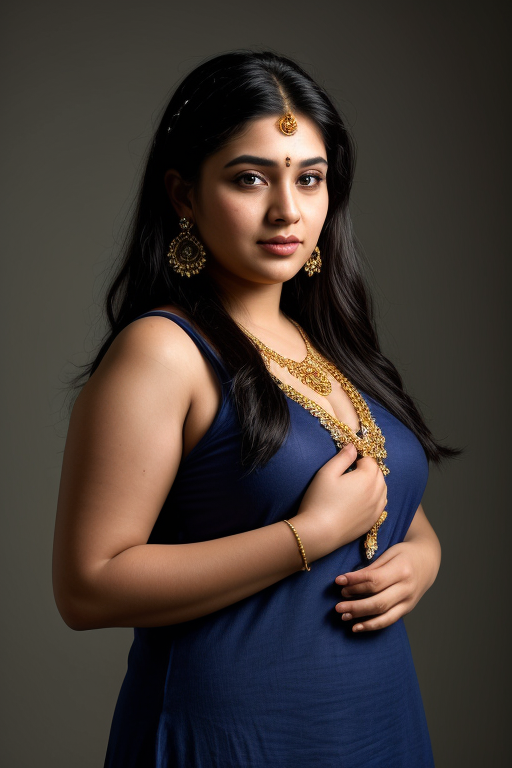

In [55]:
# Set the variables and into the pipeline
# -----------------------------------

positivePrompt = "very beautiful indian chubby woman, dark blue kurta, flowers in hair, golden jewelry, front facing, professional photograph, photography lights, dark background"
negativePrompt = "deformed body, bad face, nsfw, naked, nipples, japanese, chinese, watermarks, logos, transparent clothes"
seed = torch.Generator("cuda").manual_seed(599)
heightOfImage = 768
widthOfImage = 512
guidanceScale = 0
numOfSteps = 8
noOfImages = 1

setOfImages = sd15Pipe(
    positivePrompt,
    num_inference_steps=numOfSteps,
    negative_prompt=negativePrompt,
    height=heightOfImage,
    width=widthOfImage,
    guidance_scale=guidanceScale,
    generator=seed,
    num_images_per_prompt=noOfImages 
).images

for i in range(noOfImages):
    image = setOfImages[i]
    display(image)
    image.save("sd15_lcm"+str(i)+".png")

In [40]:
del sd15Pipe
gc.collect()
torch.cuda.empty_cache()